In [1]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
#Load CSV Files
clinical_data= pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_drug_data= pd.read_csv("raw_data/mouse_drug_data.csv")

#See what's in both data sets 
#clinical_data.head()
#mouse_drug_data.head()

In [3]:
# Merge our two data frames together
combined_data = pd.merge(clinical_data, mouse_drug_data, on = "Mouse ID")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#Dataframe with  Drug as index comparing (Capomulin, Infubinol, Ketapril, and Placebo)

Capomulin_Drug = combined_data.loc[combined_data["Drug"] == "Capomulin"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Capomulin_Drug.head()

Infubinol_Drug = combined_data.loc[combined_data["Drug"] == "Infubinol"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Infubinol_Drug.head()


Ketapril_Drug = combined_data.loc[combined_data["Drug"] == "Ketapril"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Ketapril_Drug.head()

Placebo_Drug = combined_data.loc[combined_data["Drug"] == "Placebo"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Placebo_Drug.head()

Drugs= [Capomulin_Drug, Infubinol_Drug, Ketapril_Drug, Placebo_Drug]

combined_drugs= pd.concat(Drugs)
combined_drugs.sample(10)

,Timepoint,Tumor Volume (mm3)
Drug,,
Infubinol,15,49.385574
Placebo,25,65.741777
Infubinol,35,60.064340
Placebo,15,48.857601
Ketapril,35,70.126238
Capomulin,10,46.568417
Capomulin,20,43.967895
Capomulin,30,31.758275
Ketapril,0,45.000000


In [5]:
#drug_count= combined_data["Drug"].value_counts()
#drug_count = 
drug= combined_data["Drug"].unique()
drug

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'], dtype=object)

In [6]:
drug_data= combined_data[["Drug", "Timepoint" , "Tumor Volume (mm3)"]]
drug_data= pd.DataFrame(combined_data.groupby("Drug")["Tumor Volume (mm3)"].mean())
drug_data


,Tumor Volume (mm3)
Drug,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.957935
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.106357


In [12]:
#create pivot table with selected data , get mean of Tumor Volume per timepoint per Drug
Tumor_data= combined_data.pivot_table(values=["Tumor Volume (mm3)"], index=["Drug", "Timepoint"], aggfunc=np.mean)
Tumor_data.round(3)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                      45.000
          5                      44.266
          10                     43.084
          15                     42.064
          20                     40.716
          25                     39.940
          30                     38.769
          35                     37.817
          40                     36.958
          45                     36.236
Ceftamin  0                      45.000
          5                      46.503
          10                     48.285
          15                     50.094
          20                     52.157
          25                     54.288
          30                     56.770
          35                     58.828
          40                     61.468
          45                     64.132
Infubinol 0                      45.000
          5                      47.062
          10                     49.404
          15                     51.296
          20                     53.198
          25                     55.715
          30                     58.299
          35                     60.742
          40                     63.163
          45                     65.756
...                                 ...
Ramicane  0                      45.000
          5                      43.945
          10                     42.532
          15                     41.495
          20                     40.238
          25                     38.974
          30                     38.703
          35                     37.452
          40                     36.574
          45                     34.956
Stelasyn  0                      45.000
          5                      47.527
          10                     49.464
          15                     51.529
          20                     54.067
          25                     56.166
          30                     59.827
          35                     62.441
          40                     65.356
          45                     68.438
Zoniferol 0                      45.000
          5                      46.852
          10                     48.690
          15                     50.779
          20                     53.170
          25                     55.433
          30                     57.714
          35                     60.089
          40                     62.917
          45                     65.961

[100 rows x 1 columns]

In [10]:
Tumor_data.loc["Capomulin"]

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


In [8]:
#Dataframe with  Drug as index comparing (Capomulin, Infubinol, Ketapril, and Placebo)

Capomulin_Drug = combined_data.loc[combined_data["Drug"] == "Capomulin"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Capomulin_Drug.head()

Infubinol_Drug = combined_data.loc[combined_data["Drug"] == "Infubinol"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Infubinol_Drug.head()


Ketapril_Drug = combined_data.loc[combined_data["Drug"] == "Ketapril"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Ketapril_Drug.head()

Placebo_Drug = combined_data.loc[combined_data["Drug"] == "Placebo"].set_index("Drug").drop(["Mouse ID", "Metastatic Sites"], axis=1)
#Placebo_Drug.head()

Drugs= [Capomulin_Drug, Infubinol_Drug, Ketapril_Drug, Placebo_Drug]

combined_drugs= pd.concat(Drugs)
combined_drugs.round(3)

,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,45.000
Capomulin,5,45.651
Capomulin,10,43.271
Capomulin,15,43.785
Capomulin,20,42.732
Capomulin,25,43.262
Capomulin,30,40.605
Capomulin,35,37.968
Capomulin,40,38.380


In [11]:
Tumor_data2= pd.pivot_table(combined_data, index=["Timepoint"],values=["Tumor Volume (mm3)"],columns=["Drug"], aggfunc=[np.mean])
Tumor_data2

mean                                              \
          Tumor Volume (mm3)                                               
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [13]:
#Analyze the data to show how four treatments compare
#4 Treatemnts = Capomulin, Infubinol, Ketapril, and Placebo 
TData_Capomulin= Tumor_data.loc["Capomulin"]
#TData_Capomulin



TData_Infubinol= Tumor_data.loc["Infubinol"]
#TData_Infubinol

TData_Ketapril= Tumor_data.loc["Ketapril"]
#TData_Ketapril

TData_Placebo= Tumor_data.loc["Placebo"]
#pd.DataFrame= TData_Placebo
#TData_Placebo



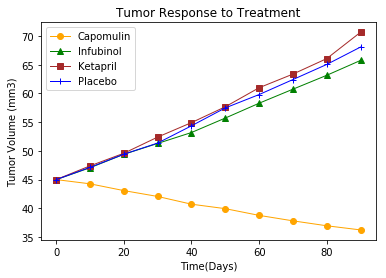

In [15]:
#Treatment Graphs
#x_axis= [0,5,10,15,20,25,30,35,40,45]
x_axis= [0,10,20,30,40,50,60,70,80,90]
TData_Capomulin, = plt.plot(x_axis, TData_Capomulin, marker="o",color="orange", linewidth=1, label="Capomulin")
TData_Infubinol, = plt.plot(x_axis, TData_Infubinol, marker="^",color="green", linewidth=1, label="Infubinol")
TData_Ketapril, = plt.plot(x_axis, TData_Ketapril, marker="s",color="brown", linewidth=1, label="Ketapril")
TData_Placebo, = plt.plot(x_axis, TData_Placebo, marker="+",color="blue", linewidth=1, label="Placebo")

plt.legend(handles=[TData_Capomulin, TData_Infubinol, TData_Ketapril, TData_Placebo,], loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()